# File and libraries

In [30]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_time_pre_proc.csv'

file_tag = "Google Merch Shop Time Series"


## DSLabs

In [31]:
%run "scripts/dslabs_functions.py"


# data functions

In [32]:
%run "scripts/data_functions.py"

data_functions loaded


# Load

In [33]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath, decimal=".",  index_col='date_hour', parse_dates=True,  infer_datetime_format=True)




else:
    data=pd.read_csv(filepath, decimal=".", index_col='date_hour', parse_dates=True,  infer_datetime_format=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2020-11-01 00:00:00 to 2021-01-31 23:00:00
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   nunique_add_to_cart_session_desktop     2208 non-null   int64
 1   nunique_add_to_cart_session_mobile      2208 non-null   int64
 2   nunique_begin_checkout_session_desktop  2208 non-null   int64
 3   nunique_begin_checkout_session_mobile   2208 non-null   int64
 4   nunique_purchase_session_desktop        2208 non-null   int64
 5   nunique_purchase_session_mobile         2208 non-null   int64
 6   nunique_session_id_desktop              2208 non-null   int64
 7   nunique_session_id_mobile               2208 non-null   int64
 8   nunique_session_id_tablet               2208 non-null   int64
 9   nunique_view_item_session_desktop       2208 non-null   int64
 10  nunique_view_item_session_mobile        2208 non

# Dimensionality

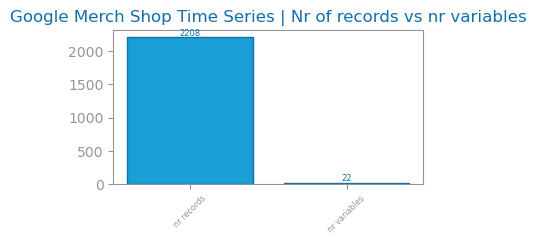

In [34]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

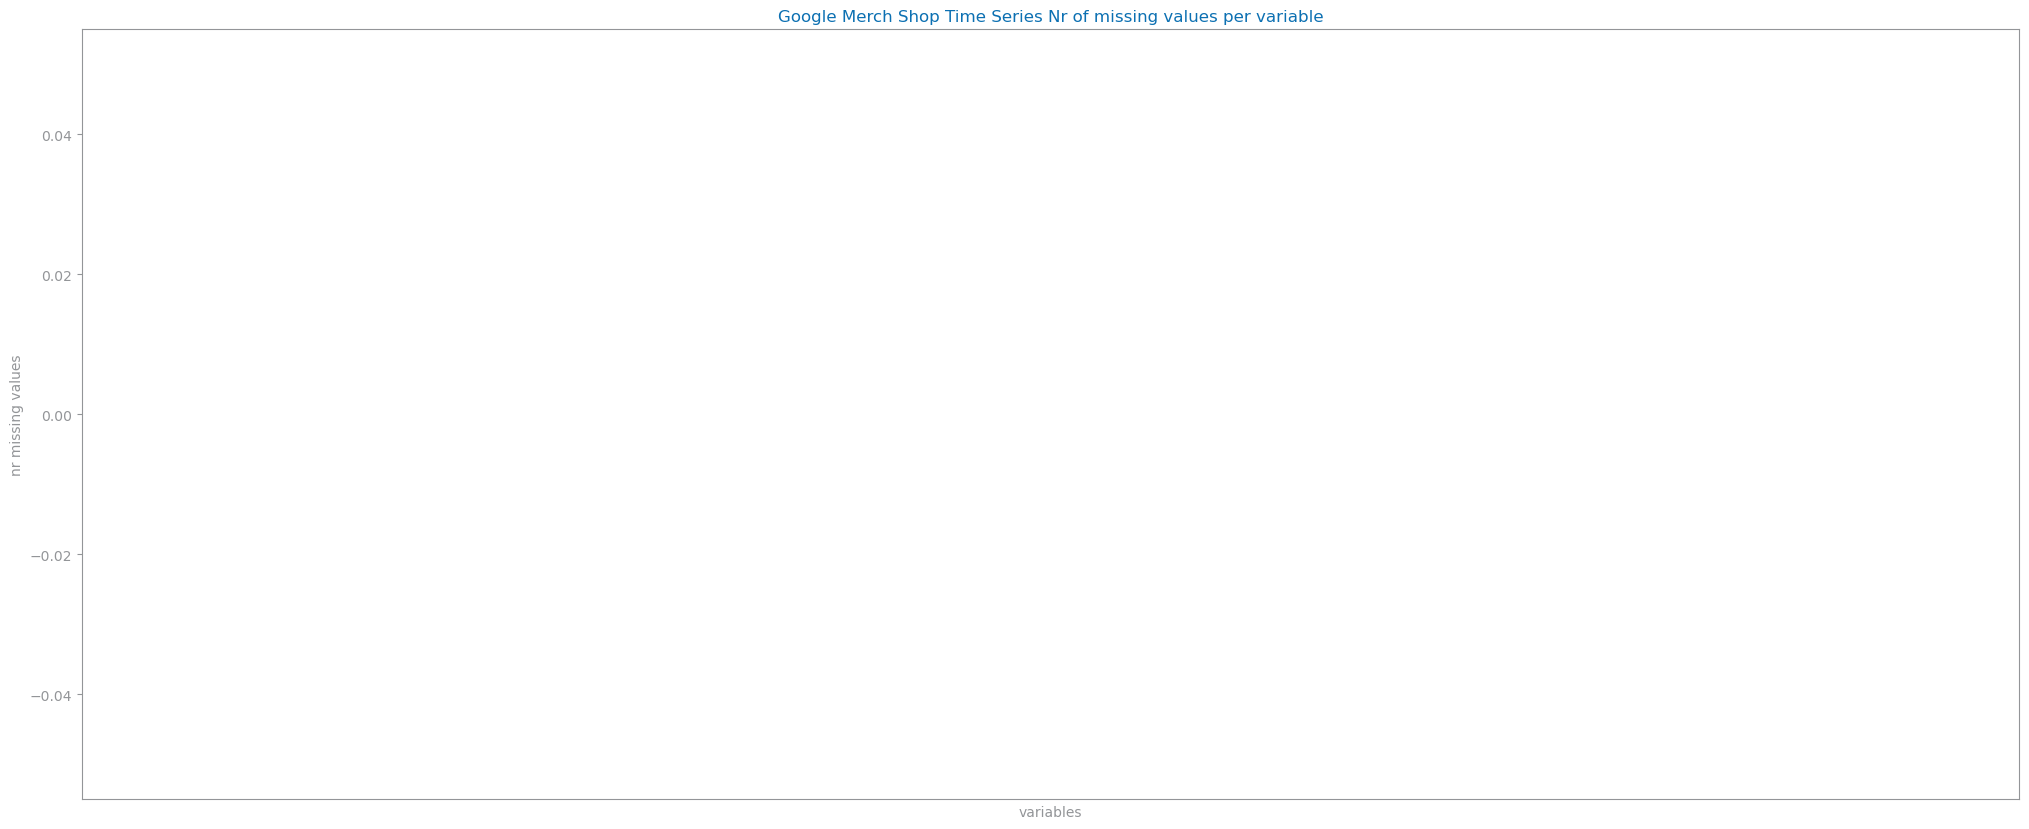

In [35]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

savefig(f"images/{file_tag}_mv.png")
show()

## Variables Type

In [36]:
data.dtypes


nunique_add_to_cart_session_desktop       int64
nunique_add_to_cart_session_mobile        int64
nunique_begin_checkout_session_desktop    int64
nunique_begin_checkout_session_mobile     int64
nunique_purchase_session_desktop          int64
nunique_purchase_session_mobile           int64
nunique_session_id_desktop                int64
nunique_session_id_mobile                 int64
nunique_session_id_tablet                 int64
nunique_view_item_session_desktop         int64
nunique_view_item_session_mobile          int64
nunique_view_item_session_tablet          int64
total_session_id                          int64
total_view_item_session                   int64
total_add_to_cart_session                 int64
total_begin_checkout_session              int64
total_purchase_session                    int64
day_of_week_nr                            int64
is_weekend                                int64
is_holiday                                int64
is_major_event_day                      

In [37]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

{'numeric': ['nunique_add_to_cart_session_desktop', 'nunique_add_to_cart_session_mobile', 'nunique_begin_checkout_session_desktop', 'nunique_begin_checkout_session_mobile', 'nunique_purchase_session_desktop', 'nunique_purchase_session_mobile', 'nunique_session_id_desktop', 'nunique_session_id_mobile', 'nunique_session_id_tablet', 'nunique_view_item_session_desktop', 'nunique_view_item_session_mobile', 'nunique_view_item_session_tablet', 'total_session_id', 'total_view_item_session', 'total_add_to_cart_session', 'total_begin_checkout_session', 'total_purchase_session', 'day_of_week_nr'], 'binary': ['is_weekend', 'is_holiday', 'is_major_event_day', 'is_commercial_event_day'], 'date': [], 'symbolic': []}


### variables per type plot

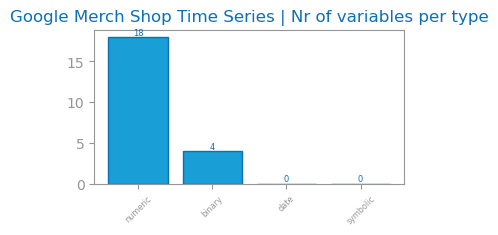

In [38]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} | Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

# Data Distribution

## describe

In [39]:
summary5: DataFrame = data.describe(include="all")
summary5

nunique_add_to_cart_session_desktop  \
count                          2208.000000   
mean                              2.206069   
std                               2.354727   
min                               0.000000   
25%                               0.000000   
50%                               2.000000   
75%                               3.000000   
max                              12.000000   

       nunique_add_to_cart_session_mobile  \
count                         2208.000000   
mean                             1.558877   
std                              1.802222   
min                              0.000000   
25%                              0.000000   
50%                              1.000000   
75%                              2.000000   
max                             12.000000   

       nunique_begin_checkout_session_desktop  \
count                             2208.000000   
mean                                 1.581069   
std                                  1.505990   
min                                  0.000000   
25%                                  0.000000   
50%                                  1.000000   
75%                                  2.000000   
max                                  8.000000   

       nunique_begin_checkout_session_mobile  \
count                            2208.000000   
mean                                1.097826   
std                                 1.195610   
min                                 0.000000   
25%                                 0.000000   
50%                                 1.000000   
75%                                 2.000000   
max                                 9.000000   

       nunique_purchase_session_desktop  nunique_purchase_session_mobile  \
count                       2208.000000                      2208.000000   
mean                           0.663949                         0.468750   
std                            0.931416                         0.745882   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            1.000000                         1.000000   
max                            6.000000                         6.000000   

       nunique_session_id_desktop  nunique_session_id_mobile  \
count                 2208.000000                2208.000000   
mean                    51.291214                  35.170290   
std                     15.953628                  11.108151   
min                     16.000000                  11.000000   
25%                     39.000000                  27.000000   
50%                     50.000000                  34.000000   
75%                     61.000000                  42.000000   
max                    121.000000                  90.000000   

       nunique_session_id_tablet  nunique_view_item_session_desktop  ...  \
count                2208.000000                        2208.000000  ...   
mean                    1.936594                          11.135417  ...   
std                     1.445447                           5.224308  ...   
min                     0.000000                           0.000000  ...   
25%                     1.000000                           7.000000  ...   
50%                     2.000000                          10.500000  ...   
75%                     3.000000                          14.000000  ...   
max                    10.000000                          32.000000  ...   

       total_session_id  total_view_item_session  total_add_to_cart_session  \
count       2208.000000              2208.000000                2208.000000   
mean          88.360507                19.184783                   3.848279   
std           25.833360                 7.978352                   3.741426   
min           34.000000                 2.000000

## Numeric Variables

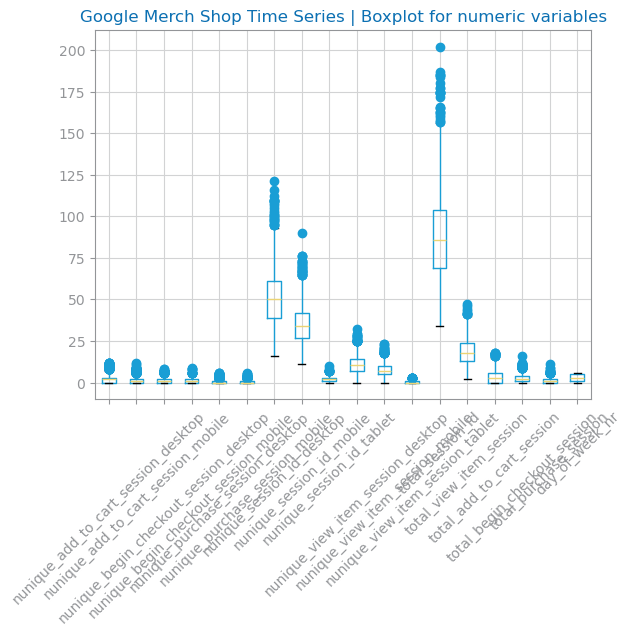

In [40]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    data[numeric].boxplot(rot=45)
    title(f'{file_tag} | Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

# multivariate chart

Nr. Records =  (2208, 22)
First timestamp 2020-11-01 00:00:00
Last timestamp 2021-01-31 23:00:00


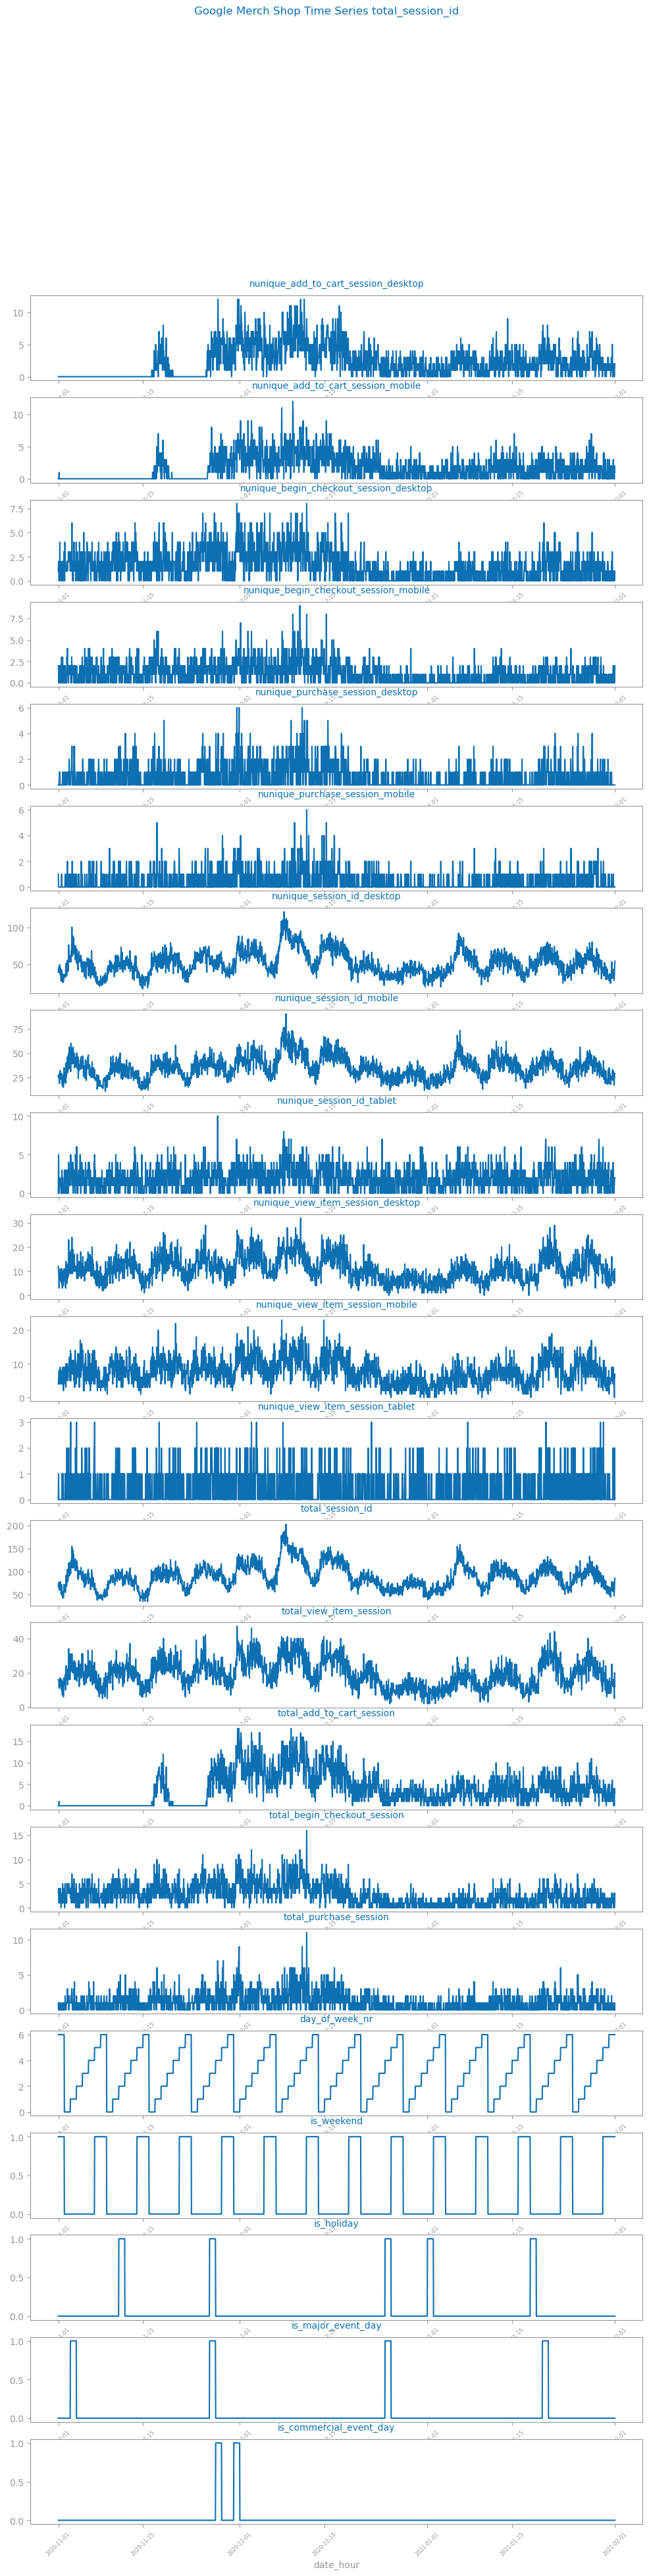

In [41]:
print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])


target = "total_session_id"


plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")
show()

## numeric variables distribution breakdown

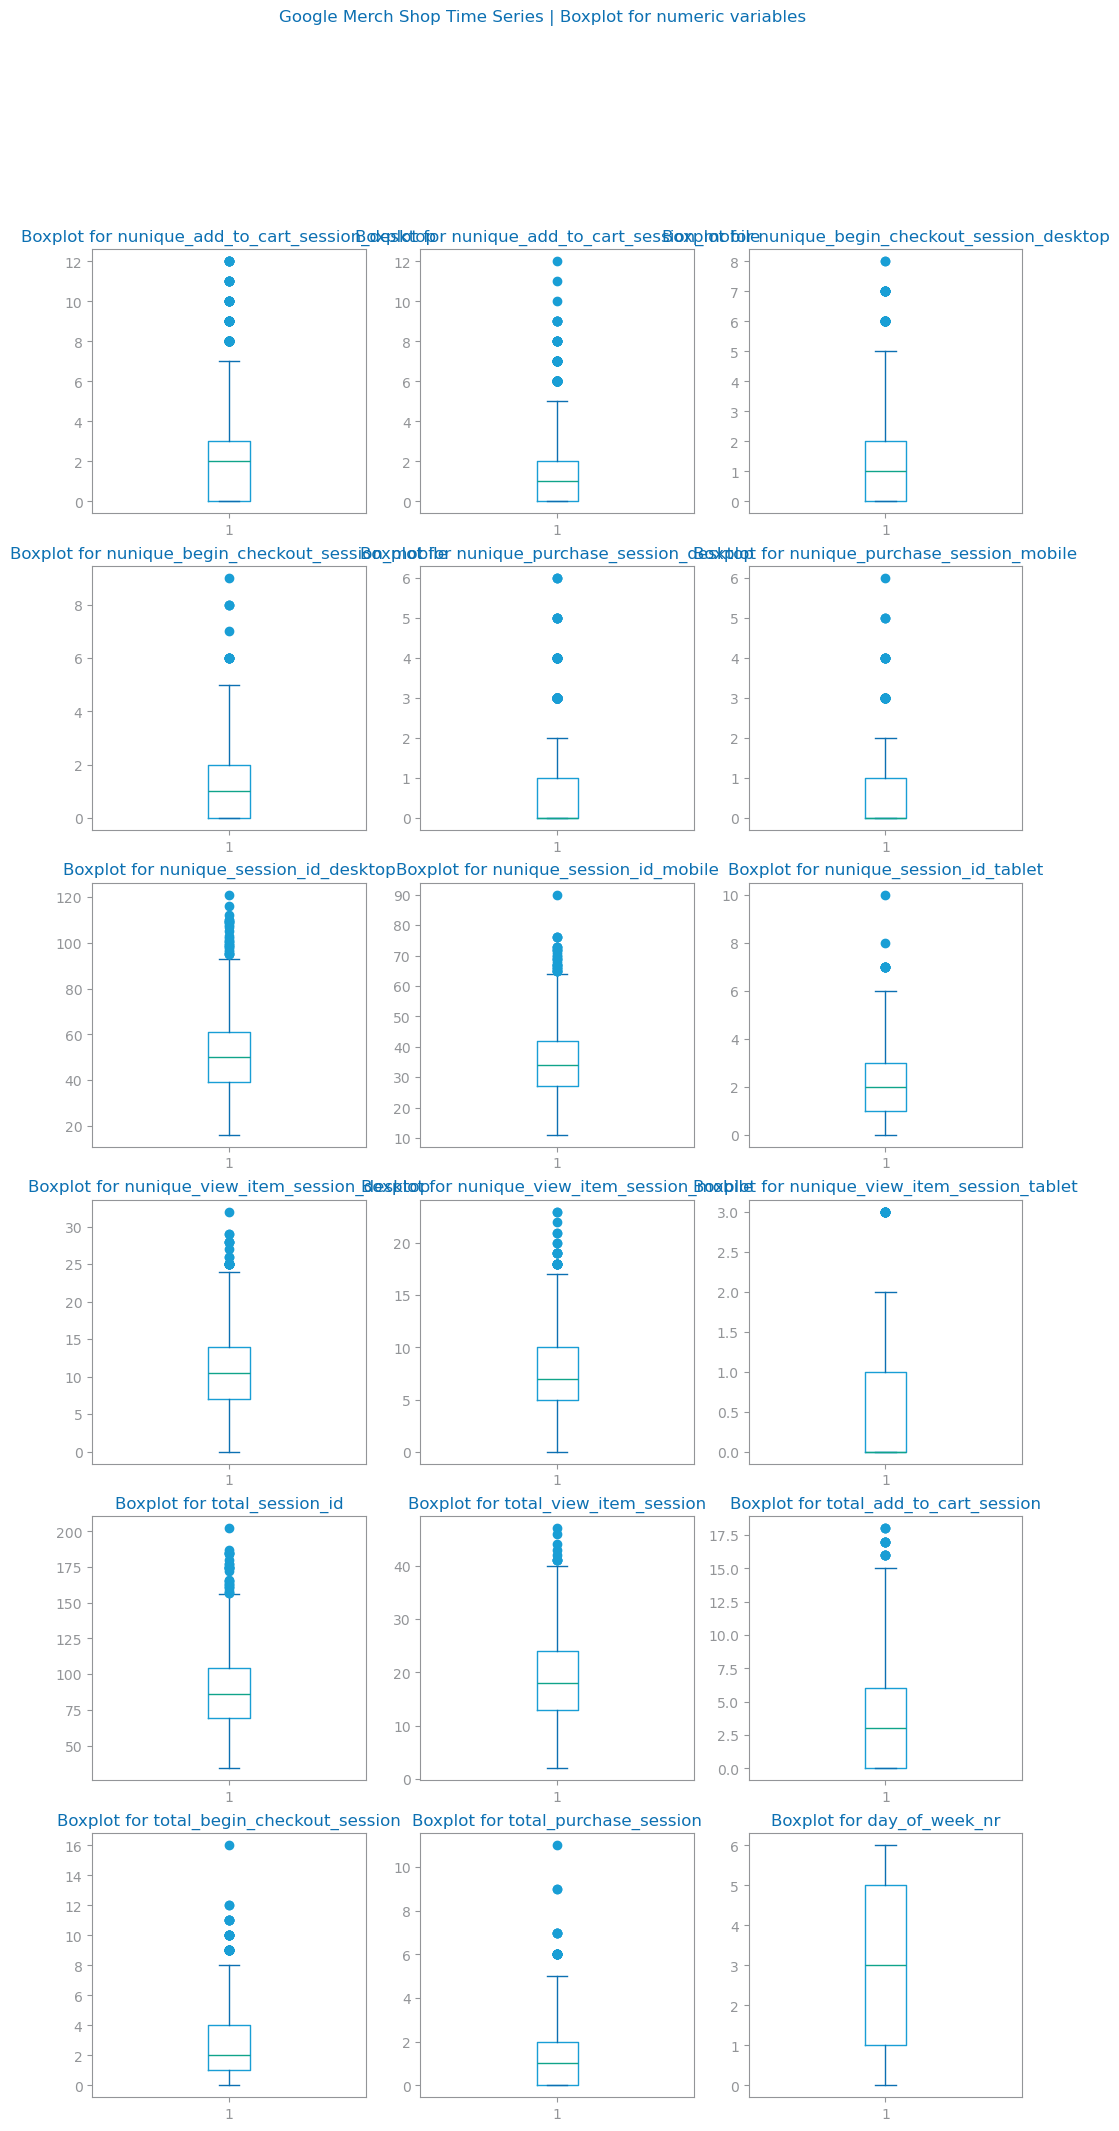

In [42]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

# Sparsity
Heavy processing. using 1% sample

In [43]:
from numpy import ndarray
from pandas import DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

# sampled_data = sampled_data.dropna()

vars: list = data.columns.to_list()
if [] != vars:
    target = "returning_user"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)

    fig.suptitle(f'{file_tag} | Sparsity Study')

    
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, ax=axs[i, j - 1])
    savefig(f"images/{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")

# Correlation Analysis

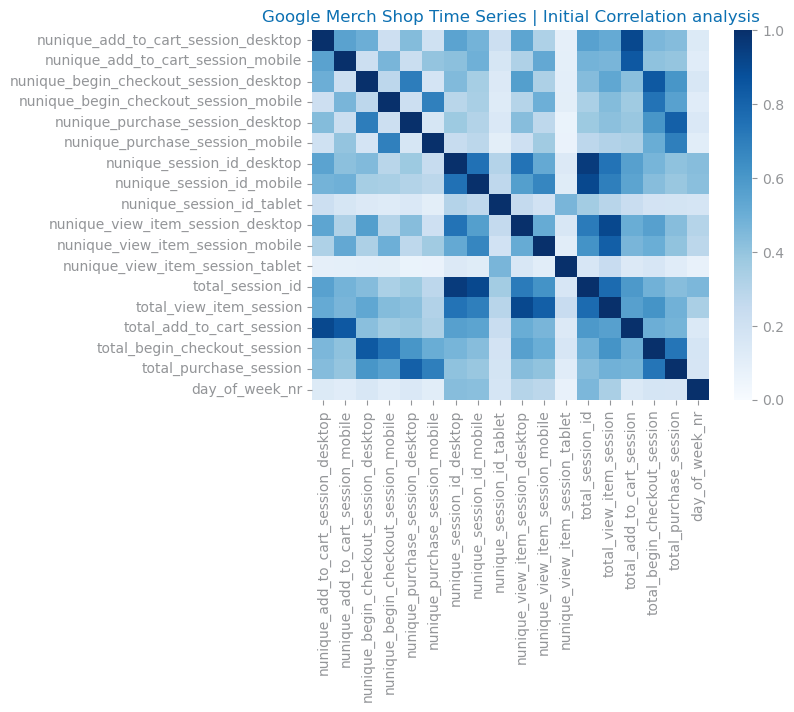

In [44]:
from seaborn import heatmap
from dslabs_functions import get_variable_types
from matplotlib.pyplot import figure, title, savefig, show

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)

title(f'{file_tag} | Initial Correlation analysis')

savefig(f"images/{file_tag}_correlation_analysis.png")
show()